<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [16]:
df.info()
print("rows: ",len(df),"\ncolumns: ",len(df.count()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Text(0.5, 1.0, 'Distribution curve for ConvertedComp')

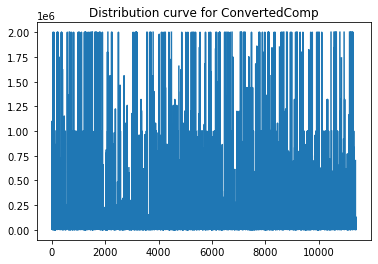

In [9]:
# your code goes here
df['ConvertedComp'].plot()
plt.title('Distribution curve for ConvertedComp')


Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Histogram for ConvertedComp')

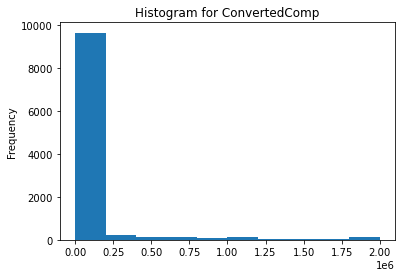

In [11]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')
plt.title('Histogram for ConvertedComp')


What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df.median()['ConvertedComp']

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
print (df['Gender'].value_counts())
df['Gender'].value_counts()["Man"]

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [23]:
# your code goes here
df.loc[df['Gender']=="Woman",'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [62]:
print("min = ",df.min()['Age'])
print("q1 = ",df.quantile(0.25)['Age'])
print("median = ",df.median()['Age'])
print("q3 = ",df.quantile(0.75)['Age'])
print("max = ",df.max()['Age'])

#df.describe()['Age']

min =  16.0
q1 =  25.0
median =  29.0
q3 =  35.0
max =  99.0


In [45]:
# your code goes here
df['Age'].describe()[3:9]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

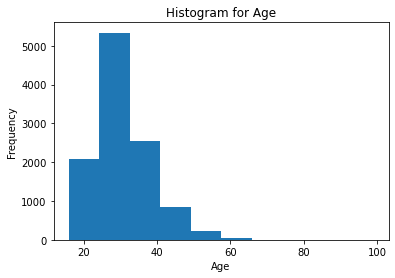

In [33]:
# your code goes here
df['Age'].plot(kind='hist')
plt.title('Histogram for Age')
plt.xlabel('Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

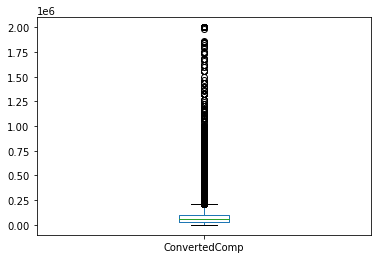

In [48]:
# your code goes here
df['ConvertedComp'].plot(kind='box')

<AxesSubplot:>

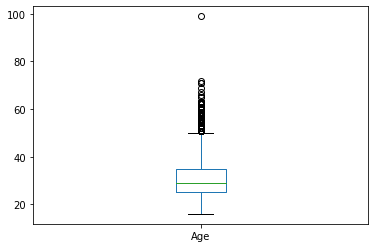

In [47]:
df['Age'].plot(kind='box')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [74]:
# your code goes here
q3 = df.quantile(0.75)['ConvertedComp']
q1 = df.quantile(0.25)['ConvertedComp']
IQR = q3-q1
IQR

73132.0

Find out the upper and lower bounds.


In [75]:
# your code goes here
upper_bound = q3+1.5*IQR
lower_bound = q1-1.5*IQR
print('upper_bound = ', upper_bound,'\nlower_bound = ', lower_bound)


upper_bound =  209698.0 
lower_bound =  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [83]:
# your code goes here
df['outlier'] = (df['ConvertedComp']>upper_bound)|(df['ConvertedComp']<lower_bound)
df['outlier'].value_counts()
#outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

False    10519
True       879
Name: outlier, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [86]:
# your code goes here
df.drop(df[df.outlier == True].index, inplace=True)
df=df.iloc[:,0:85]
print("rows: ",len(df),"\ncolumns: ",len(df.count()),"\n")


rows:  10519 
columns:  85 



In [90]:
df.median()['ConvertedComp']
df.mean()['ConvertedComp']

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [91]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
